In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
training = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

training['Training_test'] = 1
test['Training_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training, test])

all_data.shape

(1309, 13)

In [3]:
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Training_test'],
      dtype='object')

In [4]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  Training_test  891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [5]:
training.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Training_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [6]:
training.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Training_test,891.0,1.000000,0.000000,1.00,1.0000,1.0000,1.0,1.0000


In [7]:
training.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Training_test'],
      dtype='object')

In [8]:
df_num = training[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = training[['Survived', 'Pclass', 'Sex', 'Embarked', 'Ticket', 'Cabin']]

In [9]:
df_num['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

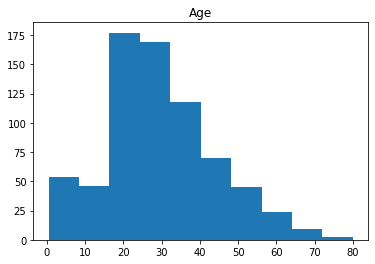

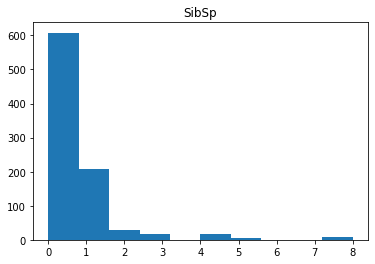

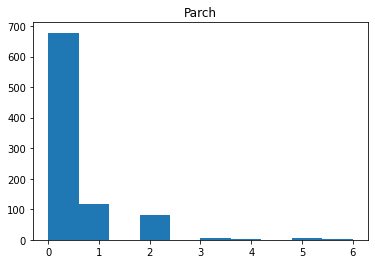

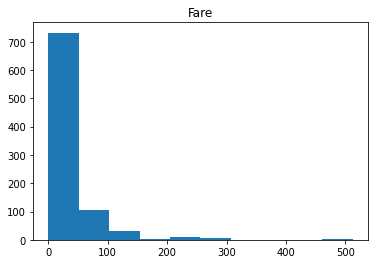

In [10]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

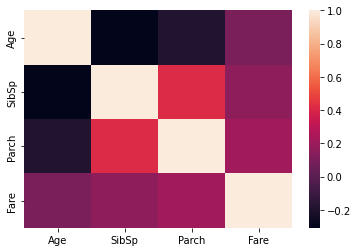

In [11]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [12]:
pd.pivot_table(training, index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


c:\python_project\pythonproject\other tutorial\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


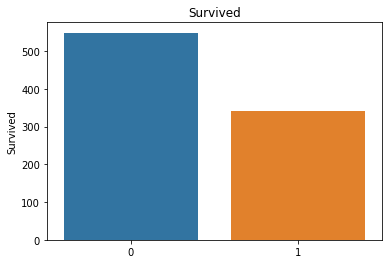

c:\python_project\pythonproject\other tutorial\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


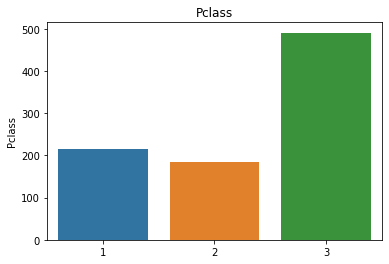

c:\python_project\pythonproject\other tutorial\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


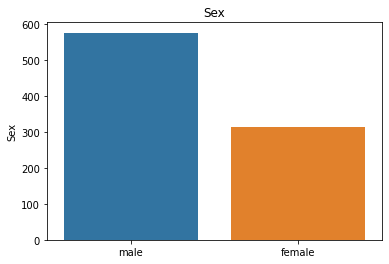

c:\python_project\pythonproject\other tutorial\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


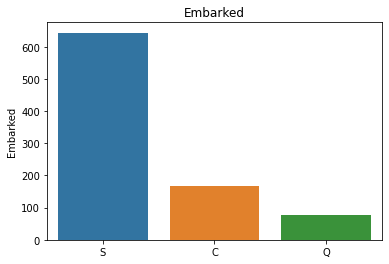

c:\python_project\pythonproject\other tutorial\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


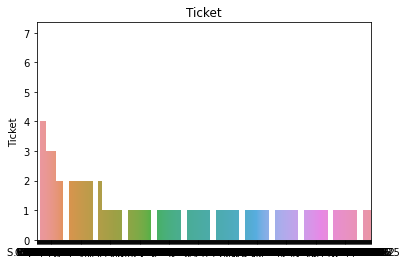

c:\python_project\pythonproject\other tutorial\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


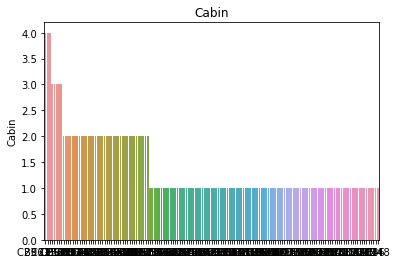

In [13]:
for i in df_cat:
    sns.barplot(df_cat[i].value_counts().index, df_cat[i].value_counts()).set(title=i)
    plt.show()

In [14]:
df_cat['Pclass'].value_counts().index 

Int64Index([3, 1, 2], dtype='int64')

In [15]:
df_cat['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
print(pd.pivot_table(training, index='Survived', columns='Pclass', values='Ticket', aggfunc='count'))
print()

print(pd.pivot_table(training, index='Survived', columns='Sex', values='Ticket', aggfunc='count'))
print()

print(pd.pivot_table(training, index='Survived', columns='Embarked', values='Ticket', aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [17]:
df_cat.Cabin
training['cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))


training['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [18]:
df_cat

,Survived,Pclass,Sex,Embarked,Ticket,Cabin
0,0,3,male,S,A/5 21171,NaN
1,1,1,female,C,PC 17599,C85
2,1,3,female,S,STON/O2. 3101282,NaN
3,1,1,female,S,113803,C123
4,0,3,male,S,373450,NaN
...,...,...,...,...,...,...
886,0,2,male,S,211536,NaN
887,1,1,female,S,112053,B42
888,0,3,female,S,W./C. 6607,NaN
889,1,1,male,C,111369,C148


In [19]:
pd.pivot_table(training, index='Survived', columns='cabin_multiple', values='Ticket', aggfunc='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [20]:
# training['cabin_crew'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else 1)

# pd.pivot_table(training, index='Survived', columns='cabin_crew', values='Ticket', aggfunc='count')

In [21]:
# training.drop('cabin_crew', axis=1, inplace=True)

In [22]:
training.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Training_test',
       'cabin_multiple'],
      dtype='object')

In [23]:

training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])
print(pd.pivot_table(training, index='Survived', columns='cabin_adv', values='Ticket', aggfunc='count'))

print(training.cabin_adv.value_counts())

cabin_adv    A     B     C     D     E    F    G    T      n
Survived                                                    
0          8.0  12.0  24.0   8.0   8.0  5.0  2.0  1.0  481.0
1          7.0  35.0  35.0  25.0  24.0  8.0  2.0  NaN  206.0
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


In [24]:
training.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [25]:
training.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [26]:
training.Cabin.isnull().sum()

687

In [27]:
print('Total Passengers: 891, Cabin members:', (891 - 687), 'Non-cabin members: 687')

Total Passengers: 891, Cabin members: 204 Non-cabin members: 687


In [28]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             714 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Cabin           204 non-null    object 
 11  Embarked        889 non-null    object 
 12  Training_test   891 non-null    int64  
 13  cabin_multiple  891 non-null    int64  
 14  cabin_adv       891 non-null    object 
dtypes: float64(2), int64(7), object(6)
memory usage: 104.5+ KB


In [29]:
training.Ticket.head(30)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
20              239865
21              248698
22              330923
23              113788
24              349909
25              347077
26                2631
27               19950
28              330959
29              349216
Name: Ticket, dtype: object

In [30]:
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace(',', '').replace('/', '').lower() if len(x.split(' ')[:-1]) > 0 else 0)

In [31]:
# print(''.join('A/5. 2151'.split(' ')[:-1]).replace(',', '').replace'(/', '').lower())
print('fdfd'.split(' ')[:-1])

[]


In [32]:
training['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [33]:
# pd.set_option("max_rows", None)
training['ticket_letters'].value_counts()

0            665
pc            60
c.a.          27
stono2.       18
a5            10
w.c.           9
scparis        9
ca.            8
sotono.q.      8
a5.            7
sotonoq        7
ca             6
f.c.c.         5
c              5
s.o.c.         5
a4.            4
a.5.           4
s.o.p.p.       3
pp             3
a4             3
scah           2
sotono2        2
s.c.paris      2
ppp            2
wep            2
scahbasle      1
f.c.           1
s.w.pp         1
as             1
s.o.p.         1
sc             1
scow           1
swpp           1
wc             1
fa             1
w.e.p.         1
soc            1
s.p.           1
s.c.a.4.       1
c.a.soton      1
Name: ticket_letters, dtype: int64

In [34]:
pd.pivot_table(training, index='Survived', values='Ticket', columns='numeric_ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [35]:
training.Name.head(50)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [36]:
training['name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
training.name_title

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: name_title, Length: 891, dtype: object

In [37]:
training.name_title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

In [38]:
pd.pivot_table(training, index='Survived', columns='name_title', values='Ticket', aggfunc='count')

name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


In [39]:
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(str(x).split(' ')))

In [40]:
all_data.cabin_multiple.value_counts()

0    1014
1     254
2      26
3      10
4       5
Name: cabin_multiple, dtype: int64

In [41]:
all_data.Cabin.value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: Cabin, Length: 186, dtype: int64

In [42]:
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])

In [43]:
training.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [44]:
training.cabin_adv.value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64

In [45]:
all_data.cabin_adv.value_counts()

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin_adv, dtype: int64

In [46]:
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

In [47]:
all_data.numeric_ticket.value_counts()

1    957
0    352
Name: numeric_ticket, dtype: int64

In [48]:
training.Ticket.head(50)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
20              239865
21              248698
22              330923
23              113788
24              349909
25              347077
26                2631
27               19950
28              330959
29              349216
30            PC 17601
31            PC 17569
32              335677
33          C.A. 24579
34            PC 17604
35              113789
36                2677
37          A./5. 2152
38              345764
39                2651
40                7546
41               11668
42              349253
43       SC

In [49]:
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('/', '').replace('.', '').lower() if len(x.split(' ')[:-1]) > 0 else 0)

# print(len('SC/Paris 2123'.split(' ')[:-1]))
print(''.join('SC/Paris 2123'.split(' ')[:-1]).replace('/', '').replace('.', '').lower())

scparis


In [50]:
training.ticket_letters.value_counts()

0            665
pc            60
c.a.          27
stono2.       18
a5            10
w.c.           9
scparis        9
ca.            8
sotono.q.      8
a5.            7
sotonoq        7
ca             6
f.c.c.         5
c              5
s.o.c.         5
a4.            4
a.5.           4
s.o.p.p.       3
pp             3
a4             3
scah           2
sotono2        2
s.c.paris      2
ppp            2
wep            2
scahbasle      1
f.c.           1
s.w.pp         1
as             1
s.o.p.         1
sc             1
scow           1
swpp           1
wc             1
fa             1
w.e.p.         1
soc            1
s.p.           1
s.c.a.4.       1
c.a.soton      1
Name: ticket_letters, dtype: int64

In [51]:
all_data.ticket_letters.value_counts()

0            961
pc            92
ca            68
a5            28
sotonoq       24
stono2        21
scparis       19
wc            15
a4            10
fcc            9
soc            8
c              8
sopp           7
pp             4
scah           4
wep            4
fc             3
sotono2        3
sca4           2
swpp           2
ppp            2
sc             2
casoton        1
lp             1
a2             1
aq4            1
stonoq         1
sca3           1
sop            1
fa             1
scahbasle      1
as             1
sp             1
scow           1
aq3            1
Name: ticket_letters, dtype: int64

In [52]:
training.Name.value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [53]:
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [54]:
all_data.name_title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: name_title, dtype: int64

In [55]:
pd.pivot_table(all_data, index='Survived', columns='name_title', values='Ticket', aggfunc='count')

name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0.0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1.0,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


In [56]:
all_data.Age = all_data.Age.fillna(training.Age.median())

In [57]:
all_data.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
413    28.0
414    39.0
415    38.5
416    28.0
417    28.0
Name: Age, Length: 1309, dtype: float64

In [58]:
training.Fare.median()

14.4542

In [59]:
all_data.Fare.median()

14.4542

In [60]:
all_data.Fare = all_data.Fare.fillna(training.Fare.median())

In [61]:
all_data.Fare

0        7.2500
1       71.2833
2        7.9250
3       53.1000
4        8.0500
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 1309, dtype: float64

In [62]:
all_data.dropna(subset=['Embarked'], inplace=True)

In [63]:
all_data.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [64]:
all_data['norm_sibsp'] = np.log(all_data.SibSp + 1)

In [65]:
all_data.SibSp.value_counts()

0    889
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [66]:
all_data['norm_sibsp'].value_counts()

0.000000    889
0.693147    319
1.098612     42
1.609438     22
1.386294     20
2.197225      9
1.791759      6
Name: norm_sibsp, dtype: int64

<AxesSubplot:>

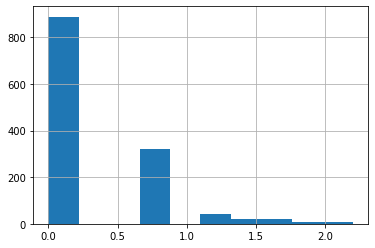

In [67]:
all_data['norm_sibsp'].hist()

In [68]:
all_data['norm_fare'] = np.log(all_data.Fare + 1)


<AxesSubplot:>

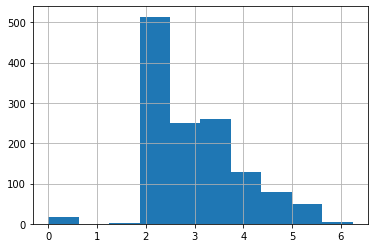

In [69]:
all_data['norm_fare'].hist()

<AxesSubplot:>

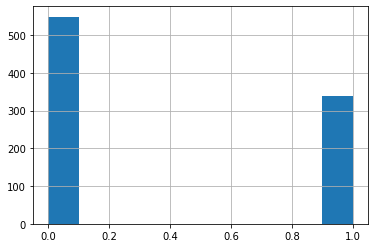

In [70]:
all_data['Survived'].hist()

In [71]:
all_data.Pclass = all_data.Pclass.astype(str)

In [72]:
all_data.value_counts()

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked  Training_test  cabin_multiple  cabin_adv  numeric_ticket  ticket_letters  name_title  norm_sibsp  norm_fare
2            1.0       1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C         1              1               C          0               pc              Mrs         0.693147    4.280593     1
622          1.0       1       Kimball, Mr. Edwin Nelson Jr                          male    42.0  1      0      11753     52.5542   D19    S         1              1               D          1               0               Mr          0.693147    3.980694     1
573          1.0       1       Flynn, Mr. John Irwin ("Irving")                      male    36.0  0      0      PC 17474  26.3875   E25    S         1              1               E          0               pc      

In [73]:
all_dummies = pd.get_dummies(all_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'norm_fare', 'Embarked', 'cabin_adv', 'cabin_multiple', 'numeric_ticket', 'name_title', 'Training_test']])

x_train = all_dummies[all_dummies.Training_test == 1].drop(['Training_test'], axis=1)
x_test = all_dummies[all_dummies.Training_test == 0].drop(['Training_test'], axis=1)


y_train = all_data[all_data.Training_test == 1].Survived
y_train.shape

(889,)

In [78]:
training.ticket_letters.value_counts()

0            665
pc            60
c.a.          27
stono2.       18
a5            10
w.c.           9
scparis        9
ca.            8
sotono.q.      8
a5.            7
sotonoq        7
ca             6
f.c.c.         5
c              5
s.o.c.         5
a4.            4
a.5.           4
s.o.p.p.       3
pp             3
a4             3
scah           2
sotono2        2
s.c.paris      2
ppp            2
wep            2
scahbasle      1
f.c.           1
s.w.pp         1
as             1
s.o.p.         1
sc             1
scow           1
swpp           1
wc             1
fa             1
w.e.p.         1
soc            1
s.p.           1
s.c.a.4.       1
c.a.soton      1
Name: ticket_letters, dtype: int64